In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## EDA

In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


there are no null values and all categorical data is in numerical form

In [6]:
df1 = df.iloc[:, 2:]
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


removing the index and dates, as dates are already converted into necessary information 

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


In [8]:
df2 = df1[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']].astype('object')

converting categorical data to objects


In [9]:
df2.dtypes

season        object
yr            object
mnth          object
holiday       object
weekday       object
workingday    object
weathersit    object
dtype: object

In [10]:
df3 = pd.concat([df2, df1.iloc[:, 7:]], axis=1)

In [11]:
df3.dtypes

season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [12]:
df3.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## getting dummies


In [13]:
df4 = pd.get_dummies(data=df3, columns=['season', 'yr', 'mnth', 'weekday', 'weathersit'], drop_first=True)

In [14]:
df4 = df4.rename(columns={'season_2': 'summer','season_3': 'fall','season_4': 'winter', 'yr_1': '2019', 'mnth_2': 'Feb', 'mnth_3': 'Mar', 'mnth_4': 'Apr', 'mnth_5':'May', 'mnth_6':'June', 'mnth_7':'July', 'mnth_8':'Aug', 'mnth_9':'Sept', 'mnth_10':'Oct', 'mnth_11':'Nov', 'mnth_12':'Dec', 'weekday_2': 'Tues', 'weekday_3': 'Wed', 'weekday_4':'Thur', 'weekday_5':'Fri','weekday_6':'Sat','weekday_1':'Mon', 'weathersit_2': 'Mist', 'weathersit_3': 'Light Snow', 'weathersit_4':'Heavy Rain'})

In [15]:
df4.head()

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,summer,...,Nov,Dec,Mon,Tues,Wed,Thur,Fri,Sat,Mist,Light Snow
0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,...,0,0,0,0,1,0,0,0,0,0


### splitting into train and test


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
np.random.seed(0)
df_train, df_test = train_test_split(df4, train_size = 0.7, random_state=100)

In [18]:
print(df_train.shape, df_test.shape)

(510, 32) (220, 32)


### Analysing the df_train

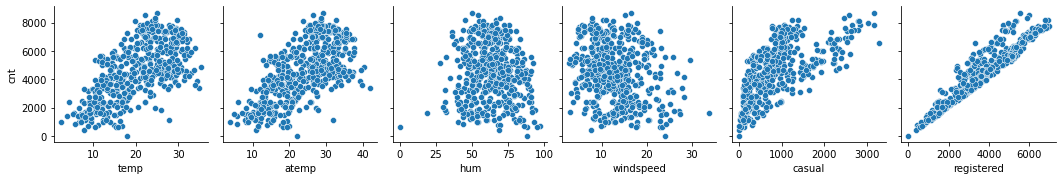

In [19]:
sns.pairplot(data=df_train, x_vars=['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered'], y_vars='cnt')

from the above pairplots, we can see that their is strong relationship between cnt with registered and somewhat srong with casual
their is weak relationship between cnt and temp and atemp
no such relationship between hum and windspeed

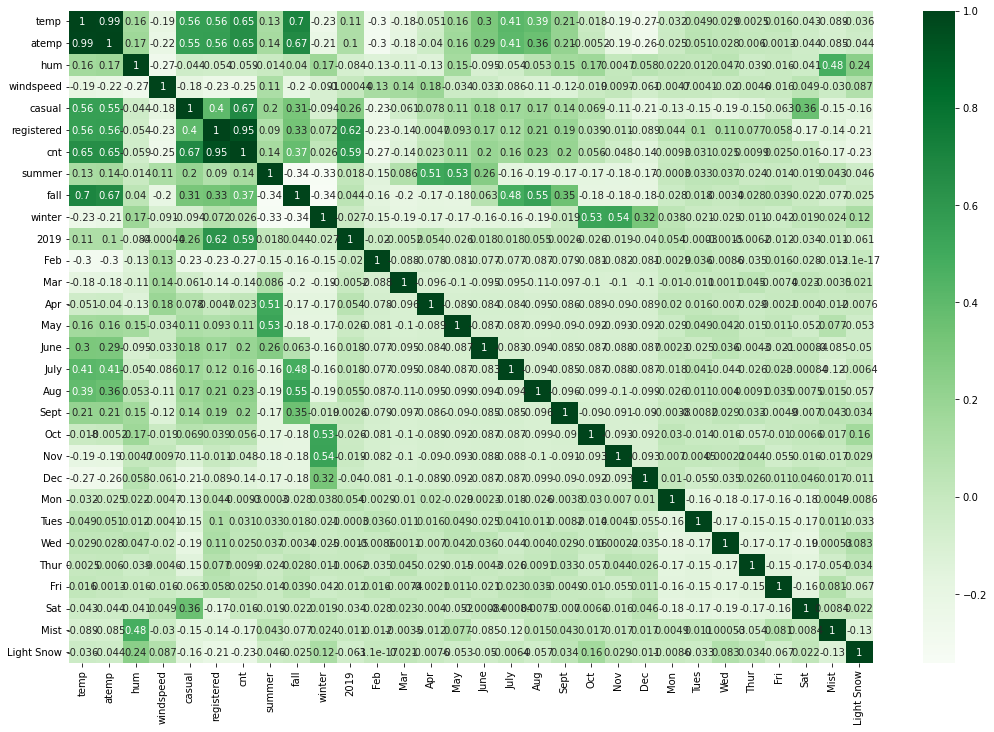

In [20]:
plt.figure(figsize = (18, 12))
sns.heatmap(data=df_train.corr(), annot=True, cmap='Greens')
plt.show()

temp and atemp are highly correlated 


In [21]:
df_train_1 = df_train.drop(columns=['atemp', 'temp'])

In [22]:
df_train_1.head()

,holiday,workingday,hum,windspeed,casual,registered,cnt,summer,fall,winter,...,Nov,Dec,Mon,Tues,Wed,Thur,Fri,Sat,Mist,Light Snow
576,0,1,70.4167,11.083475,968,6248,7216,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,0,0,62.1250,10.792293,956,3110,4066,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,0,0,48.3333,23.500518,364,1432,1796,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,0,0,48.9583,8.708325,1120,3100,4220,1,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0,1,72.9583,14.707907,177,1506,1683,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [23]:
df_train_1.describe()

,hum,windspeed,casual,registered,cnt,summer,fall,winter,2019,Feb,...,Nov,Dec,Mon,Tues,Wed,Thur,Fri,Sat,Mist,Light Snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,63.123710,12.834912,837.633333,3647.703922,4485.337255,0.247059,0.262745,0.247059,0.507843,0.066667,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412
std,14.153170,5.292031,675.936359,1578.410906,1950.666077,0.431725,0.440557,0.431725,0.500429,0.249689,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124
min,0.000000,2.834381,2.000000,20.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.270825,9.041918,311.000000,2468.250000,3120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.437500,12.083182,700.000000,3657.000000,4530.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,73.250025,15.750879,1076.250000,4841.000000,5973.500000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,97.041700,34.000021,3283.000000,6946.000000,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Rescaling features 

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [25]:
features = ['hum', 'windspeed', 'casual', 'registered', 'cnt']
df_train_1[features] = scaler.fit_transform(df_train_1[features])

In [26]:
df_train_1.head()

,holiday,workingday,hum,windspeed,casual,registered,cnt,summer,fall,winter,...,Nov,Dec,Mon,Tues,Wed,Thur,Fri,Sat,Mist,Light Snow
576,0,1,0.725633,0.264686,0.294422,0.899220,0.827658,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,0,0,0.640189,0.255342,0.290765,0.446145,0.465255,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,0,0,0.498067,0.663106,0.110332,0.203869,0.204096,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,0,0,0.504508,0.188475,0.340750,0.444701,0.482973,1,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0,1,0.751824,0.380981,0.053337,0.214554,0.191095,1,0,0,...,0,0,0,0,0,0,1,0,1,0


## Building Models

In [27]:
X_train = df_train_1.drop(columns='cnt')
y_train = df_train_1['cnt']

In [28]:
X_train.head()

,holiday,workingday,hum,windspeed,casual,registered,summer,fall,winter,2019,...,Nov,Dec,Mon,Tues,Wed,Thur,Fri,Sat,Mist,Light Snow
576,0,1,0.725633,0.264686,0.294422,0.899220,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
426,0,0,0.640189,0.255342,0.290765,0.446145,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
728,0,0,0.498067,0.663106,0.110332,0.203869,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
482,0,0,0.504508,0.188475,0.340750,0.444701,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
111,0,1,0.751824,0.380981,0.053337,0.214554,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [29]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

####  RFE

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [31]:
regress = LinearRegression()

In [32]:
regress.fit(X_train, y_train)

LinearRegression()

In [33]:
rfe = RFE(regress, 15)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [34]:
rfe = rfe.fit(X_train, y_train)

In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', False, 10),
 ('workingday', False, 6),
 ('hum', True, 1),
 ('windspeed', False, 7),
 ('casual', True, 1),
 ('registered', True, 1),
 ('summer', False, 2),
 ('fall', True, 1),
 ('winter', False, 9),
 ('2019', True, 1),
 ('Feb', True, 1),
 ('Mar', True, 1),
 ('Apr', False, 15),
 ('May', False, 3),
 ('June', True, 1),
 ('July', True, 1),
 ('Aug', False, 11),
 ('Sept', False, 8),
 ('Oct', True, 1),
 ('Nov', True, 1),
 ('Dec', True, 1),
 ('Mon', True, 1),
 ('Tues', False, 14),
 ('Wed', False, 12),
 ('Thur', False, 5),
 ('Fri', False, 13),
 ('Sat', False, 4),
 ('Mist', True, 1),
 ('Light Snow', True, 1)]

In [36]:
X_rfe = X_train[X_train.columns[rfe.support_]]

In [37]:
X_rfe

,hum,casual,registered,fall,2019,Feb,Mar,June,July,Oct,Nov,Dec,Mon,Mist,Light Snow
576,0.725633,0.294422,0.899220,1,1,0,0,0,1,0,0,0,0,0,0
426,0.640189,0.290765,0.446145,0,1,0,1,0,0,0,0,0,0,1,0
728,0.498067,0.110332,0.203869,0,1,0,0,0,0,0,0,1,0,0,0
482,0.504508,0.340750,0.444701,0,1,0,0,0,0,0,0,0,0,1,0
111,0.751824,0.053337,0.214554,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.679690,0.298994,0.903552,1,1,0,0,0,0,0,0,0,0,0,0
53,0.435939,0.041756,0.253826,0,0,1,0,0,0,0,0,0,0,0,0
350,0.577930,0.083206,0.352873,0,0,0,0,0,0,0,0,1,0,1,0
79,0.759870,0.121609,0.239099,0,0,0,1,0,0,0,0,0,1,1,0


In [38]:
import statsmodels.api as sm  

In [39]:
X_rfe = sm.add_constant(X_rfe)

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [40]:
X_rfe.head()

,const,hum,casual,registered,fall,2019,Feb,Mar,June,July,Oct,Nov,Dec,Mon,Mist,Light Snow
576,1.0,0.725633,0.294422,0.899220,1,1,0,0,0,1,0,0,0,0,0,0
426,1.0,0.640189,0.290765,0.446145,0,1,0,1,0,0,0,0,0,0,1,0
728,1.0,0.498067,0.110332,0.203869,0,1,0,0,0,0,0,0,1,0,0,0
482,1.0,0.504508,0.340750,0.444701,0,1,0,0,0,0,0,0,0,0,1,0
111,1.0,0.751824,0.053337,0.214554,0,0,0,0,0,0,0,0,0,0,1,0


In [41]:
lm = sm.OLS(y_train,X_rfe).fit()

In [42]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.229e+30
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        18:25:18   Log-Likelihood:                 16967.
No. Observations:                 510   AIC:                        -3.390e+04
Df Residuals:                     494   BIC:                        -3.383e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.227e-16   2.36e-16      1.369      0.1

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,36.94
3,registered,2.50
5,2019,1.95
4,fall,1.90
1,hum,1.64
14,Mist,1.60
2,casual,1.48
15,Light Snow,1.36
9,July,1.35
10,Oct,1.29


removing Mar column


In [44]:
X_rfe_1 = X_rfe.drop(['Mar'], axis = 1)

In [45]:
lm = sm.OLS(y_train,X_rfe_1).fit() 

In [46]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.392e+30
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        18:25:18   Log-Likelihood:                 16829.
No. Observations:                 510   AIC:                        -3.363e+04
Df Residuals:                     495   BIC:                        -3.356e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.318e-16   2.96e-16     -0.446      0.6

removing Light Snow

In [47]:
X_rfe_2 = X_rfe.drop(['Light Snow', 'Mar'], axis = 1)
lm = sm.OLS(y_train,X_rfe_2).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.314e+30
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        18:25:19   Log-Likelihood:                 16795.
No. Observations:                 510   AIC:                        -3.356e+04
Df Residuals:                     496   BIC:                        -3.350e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.163e-16   3.14e-16      1.325      0.1

instaed of june removing Feb

In [48]:
X_rfe_3 = X_rfe.drop(['Light Snow', 'Mar', 'Feb'], axis = 1)
lm = sm.OLS(y_train,X_rfe_3).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.840e+31
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        18:25:19   Log-Likelihood:                 17557.
No. Observations:                 510   AIC:                        -3.509e+04
Df Residuals:                     497   BIC:                        -3.503e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.714e-17   6.72e-17      1.445      0.1

removing fall

In [49]:
X_rfe_4 = X_rfe.drop(['Light Snow', 'Mar', 'Feb', 'fall'], axis = 1)
lm = sm.OLS(y_train,X_rfe_4).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.939e+30
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        18:25:19   Log-Likelihood:                 17031.
No. Observations:                 510   AIC:                        -3.404e+04
Df Residuals:                     498   BIC:                        -3.399e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.173e-16   1.86e-16     -3.851      0.0

removing July

In [50]:
X_rfe_5 = X_rfe.drop(['Light Snow', 'Mar', 'Feb', 'fall', 'July'], axis = 1)
lm = sm.OLS(y_train,X_rfe_5).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.545e+29
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        18:25:20   Log-Likelihood:                 16585.
No. Observations:                 510   AIC:                        -3.315e+04
Df Residuals:                     499   BIC:                        -3.310e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.048e-16   4.46e-16      1.131      0.2

removing June

In [51]:
X_rfe_6 = X_rfe.drop(['Light Snow', 'Mar', 'Feb', 'fall', 'July', 'June'], axis = 1)
lm = sm.OLS(y_train,X_rfe_6).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.527e+31
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        18:25:20   Log-Likelihood:                 17324.
No. Observations:                 510   AIC:                        -3.463e+04
Df Residuals:                     500   BIC:                        -3.459e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.574e-16   1.04e-16     -3.420      0.0

removing Mist

In [52]:
X_rfe_7 = X_rfe.drop(['Light Snow', 'Mar', 'Feb', 'fall', 'July', 'June', 'Mist'], axis = 1)
lm = sm.OLS(y_train,X_rfe_7).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.881e+30
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        18:25:20   Log-Likelihood:                 16760.
No. Observations:                 510   AIC:                        -3.350e+04
Df Residuals:                     501   BIC:                        -3.346e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.327e-17   3.08e-16      0.270      0.7

removing Nov

In [53]:
X_rfe_8 = X_rfe.drop(['Light Snow', 'Mar', 'Feb', 'fall', 'July', 'June', 'Mist', 'Nov'], axis = 1)
lm = sm.OLS(y_train,X_rfe_8).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.759e+31
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        18:25:21   Log-Likelihood:                 17705.
No. Observations:                 510   AIC:                        -3.539e+04
Df Residuals:                     502   BIC:                        -3.536e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.596e-16   4.81e-17      3.316      0.0

removing Mon

In [54]:
X_rfe_9 = X_rfe.drop(['Light Snow', 'Mar', 'Feb', 'fall', 'July', 'June', 'Mist', 'Nov', 'Mon'], axis = 1)
lm = sm.OLS(y_train,X_rfe_9).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.465e+32
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        18:25:21   Log-Likelihood:                 17796.
No. Observations:                 510   AIC:                        -3.558e+04
Df Residuals:                     503   BIC:                        -3.555e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.314e-16   4.01e-17    -15.738      0.0

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_rfe_9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,28.14
3,registered,1.81
4,2019,1.64
2,casual,1.24
6,Dec,1.06
5,Oct,1.05
1,hum,1.04


In [56]:
lm.params

const        -6.314393e-16
hum           8.326673e-16
casual        3.774735e-01
registered    7.968247e-01
2019         -7.285839e-17
Oct          -5.898060e-17
Dec           1.179612e-16
dtype: float64

###### as both VIF and P>|t| are low, we can continue with this model

# Error Analysis

In [57]:
y_train_rfe = lm.predict(X_rfe_9)

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

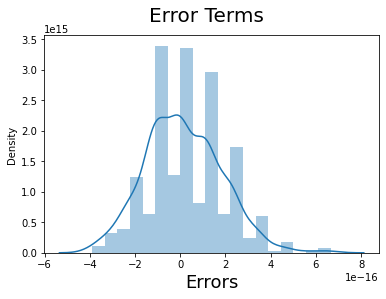

In [58]:
fig = plt.figure()
sns.distplot((y_train - y_train_rfe))
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18) 

from this the model follows normal curve arround 0 mean

# Running on df_test 

In [59]:
df_test[features] = scaler.transform(df_test[features])

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [60]:
X_test, y_test = df_test.drop(columns='cnt'), df_test['cnt']

In [61]:
X_test_1 = sm.add_constant(X_test)

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [62]:
X_test_2 = X_test_1[list(X_rfe_9.columns)]

In [63]:
y_test_pred = lm.predict(X_test_2)

Text(0, 0.5, 'y_pred')

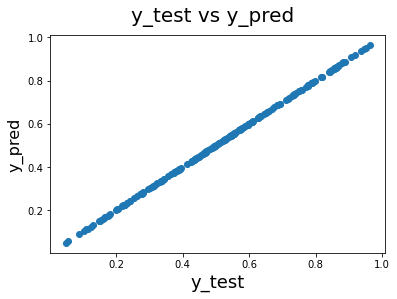

In [64]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16) 

In [65]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

1.0